In [8]:
import pandas as pd
import numpy as np
import scipy.io
import statsmodels.api as sm

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

In [9]:
df = pd.read_csv("./output/ek-us-cross-section.csv")

In [10]:
df.head()

,income,assets,homeshare,expenditure,x1,x2,x3,x4,x5,x6,...,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,6.989937,6.454545,0.908831,1.408636,-6.048729,-6.672426,-7.722944,-4.609209,-6.973730,-6.365780,...,-5.308454,-4.511148,-7.183592,-6.645985,-6.752380,-6.876063,-5.992711,-6.118121,-5.251281,-0.188842
1,6.206623,5.681818,0.918562,1.328545,-6.235224,-6.882100,-7.975169,-4.753452,-7.170890,-6.564047,...,-5.453786,-4.653813,-7.388907,-6.831364,-6.964572,-7.070328,-6.157179,-6.306654,-5.411758,-0.174078
2,5.423308,4.909091,0.928376,1.245876,-6.427429,-7.098730,-8.236691,-4.918408,-7.424519,-6.768539,...,-5.638554,-4.817066,-7.624798,-7.070564,-7.183917,-7.320352,-6.368034,-6.501047,-5.595446,-0.158585
3,4.983189,4.222222,0.915223,1.360013,-6.164773,-6.808711,-7.897369,-4.706260,-7.120885,-6.491730,...,-5.405045,-4.607065,-7.339780,-6.781634,-6.890603,-7.020766,-6.107559,-6.257694,-5.363234,-0.180056
4,4.116051,3.621212,0.927072,1.261502,-6.425712,-7.075434,-8.225694,-4.905911,-7.405497,-6.770336,...,-5.629864,-4.784927,-7.638428,-7.047234,-7.191379,-7.301113,-6.340032,-6.499525,-5.563908,-0.161541


In [11]:
poor = df.expenditure < df.expenditure.quantile(0.25)

rich = df.expenditure > df.expenditure.quantile(0.75)

In [12]:
print("Rich Home Share: ", round(1 - df.homeshare[rich].median(), 3))

print("Poor Home Share: ", round(1 - df.homeshare[poor].median(), 3))

print("Rich Elasticity: ", round(df.x2[rich].median(), 3))

print("Poor Elasticity: ", round(df.x2[poor].median(), 3))

Rich Home Share:  0.099
Poor Home Share:  0.004
Rich Elasticity:  -6.629
Poor Elasticity:  -14.208


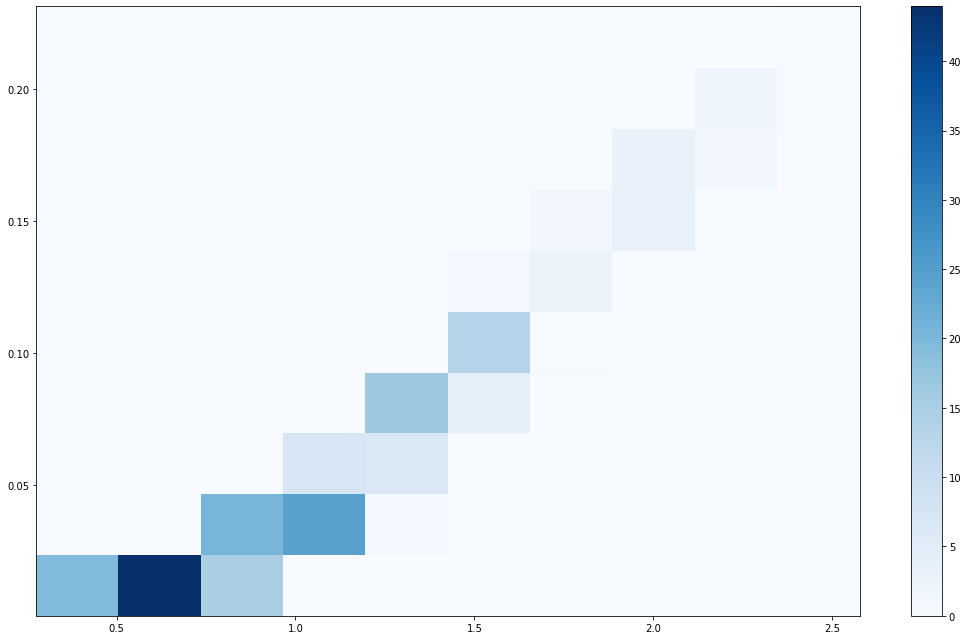

In [13]:
fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

h = ax.hist2d(df.expenditure, (1 - df.homeshare), bins=10, cmap='Blues', density = True)

fig.colorbar(h[3], ax=ax)

# ax.set_ylim(0.045,0.20)
# ax.set_xlim(0.35,2.0)

plt.show()

In [54]:
#define response variable
y = (1 - df.homeshare)

#define predictor variables
x = df.expenditure

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              homeshare   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     3367.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:26:38   Log-Likelihood:             2.2901e+05
No. Observations:              100000   AIC:                        -4.580e+05
Df Residuals:                   99998   BIC:                        -4.580e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1111      0.000    576.778      

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


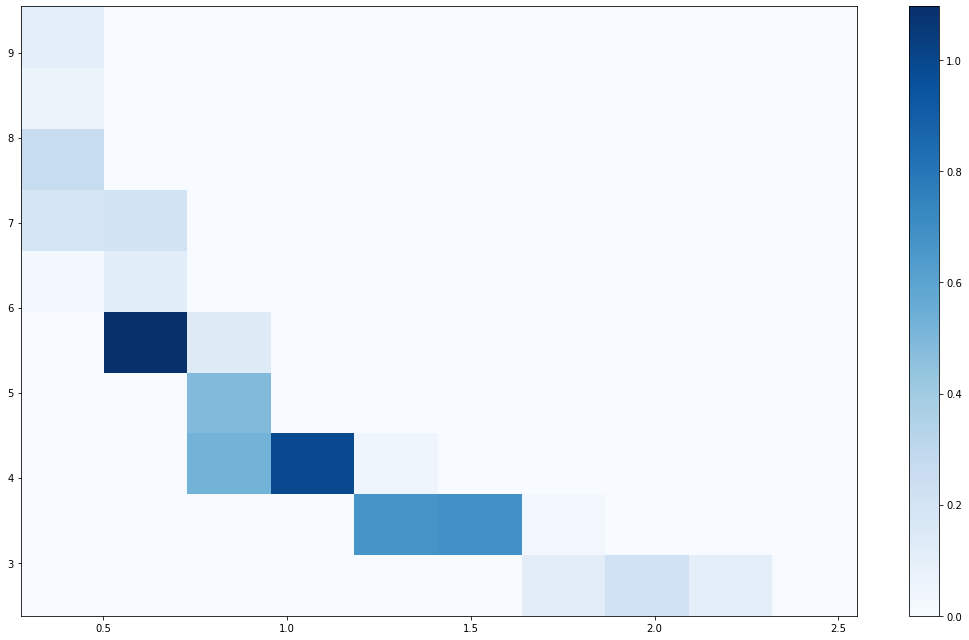

In [47]:
fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

h = ax.hist2d(df.expenditure, (- df.x2), bins=10, cmap='Blues', density = True)

fig.colorbar(h[3], ax=ax)

plt.show()